## Q1.
(10%) Can you think of a few applications for each type of RNN, a sequence-to-sequence RNN, a sequence-to-vector RNN,  a vector-to-sequence RNN, and a vector-to-vector RNN?

**Ans.** 

* Sequence-to-Sequence: Time Series Prediction, Stock Price, weather forecast, translation, speech-to-text.
* Sequence-to-Vector: Sentiment Analysis to get the review of the user, classifying music samples, predicting the probability that a user will watch a movie based on his/her watch history.
* Vector-to-Sequence: Generating captions to describe a figure, name entity recognition, translation, pedestrian detection in video frame.
* Vector-to-Vector: Machine translation, Language translation, Neural Network structure.

## Q2.
(10%) How many dimensions are required for input of an RNN layer? Can you use some examples to illustrate what are these dimensions and their purposes? How about the dimensions of the RNN output? 

**Ans.** 

* 3 dimensional Input: Batch Size, No. of Time Steps, Number of Input features
* 3 dimensional Output: Batch Size, No. of Time Steps, Number of Neurons

Eg: The three dimesion can be location, distance, velocity <br>
Input Shape = [3,4,5], Here 3 is batchsize, 4 is the no. of steps and 5 is Number of Input Features.  
Output Shape = [3,4,10], Here 3 is batchsize, 4 is the no. of steps and 10 is Number of Neurons.




## Q3. 
(10%) Gated Recurrent Unit(GRU) is another kind of neuron which can perform memory retention as LSTM, could you explain this and compare this with LSTM?

**Ans.** 

* A GRU has two gates, an LSTM has three gates.
* GRUs don’t possess and internal memory ( c<sub>t</sub> ) that is different from the exposed hidden state. They don’t have the output gate that is present in LSTMs.
* The input and forget gates are coupled by an update gate  z  and the reset gate  r  is applied directly to the previous hidden state. Thus, the responsibility of the reset gate in a LSTM is really split up into both  r  and  z.
* We don’t apply a second nonlinearity when computing the output.

Reference: [https://ai-master.gitbooks.io/lstm/content/gru-vs-lstm.html](https://ai-master.gitbooks.io/lstm/content/gru-vs-lstm.html)

## Q4. 
(40%, coding assignment) As we demo the bidirectional effect in IMDB dataset (see code: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.3-advanced-usage-of-recurrent-neural-networks.ipynb), can you try to modify RNN model to improve performance, e.g., improve accuracy to 95%? For example, we may change the number of units in each recurrent layer, adjust the learning rate or change optimizer, or try using LSTM layers instead of GRU layers.

In [ ]:
#Libraries
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN
import matplotlib.pyplot as plt

In [ ]:
# Preprocessing
max_features = 10000
maxlen = 500
batch_size = 32
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen) 
x_test = sequence.pad_sequences(x_test, maxlen=maxlen) 

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
# RNN Model
model = Sequential() 
model.add(Embedding(max_features, 32)) 
model.add(SimpleRNN(32)) 
model.add(Dense(1, activation='relu'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 22s 143ms/step - loss: 0.7192 - acc: 0.5634 - val_loss: 0.6435 - val_acc: 0.6342
Epoch 2/10
157/157 [==============================] - 22s 140ms/step - loss: 0.5665 - acc: 0.7640 - val_loss: 0.6921 - val_acc: 0.7100
Epoch 3/10
157/157 [==============================] - 22s 140ms/step - loss: 0.3982 - acc: 0.8769 - val_loss: 0.9618 - val_acc: 0.7290
Epoch 4/10
157/157 [==============================] - 22s 138ms/step - loss: 0.2675 - acc: 0.9356 - val_loss: 0.9688 - val_acc: 0.8054
Epoch 5/10
157/157 [==============================] - 22s 139ms/step - loss: 0.1884 - acc: 0.9642 - val_loss: 1.1699 - val_acc: 0.7898
Epoch 6/10
157/157 [==============================] - 25s 157ms/step - loss: 0.1406 - acc: 0.9765 - val_loss: 1.6257 - val_acc: 0.7594
Epoch 7/10
157/157 [==============================] - 25s 161ms/step - loss: 0.0889 - acc: 0.9893 - val_loss: 1.9815 - val_acc: 0.7454
Epoch 8/10
157/157 [==============================] - 2

In [ ]:
#Test the Model
accuracy = model.evaluate(x_train, y_train, verbose=0)
print('Accuracy:', accuracy[1])

Accuracy: 0.953279972076416


## Q5.

### Q1.
(5%) **You are training an RNN and find that your weights and activations are all taking on the value of NaN (“Not a Number”). Which of these is the most likely cause of this problem? (Choose one option)** <br />
A. Vanishing gradient problem. <br />
B. Exploding gradient problem. <br />

**Ans.** B. Exploding gradient problem. 

### Q2. 
(5%) **To which of these tasks would you apply a many-to-one RNN architecture? (Check all that apply)** <br />
A.	Image classification (input an image and output a label) <br />
B.	Gender recognition from speech (input an audio clip and output a label indicating the speaker’s gender) <br />
C.	Speech recognition (input an output clip and output a transcript) <br />
D.	Sentiment classification (input a piece of text and output 0/1 to denote positive or negative sentiment)


**Ans.** B & D

### Q3.
The figure below represents a RNN after it has been unrolled (to 3 time steps). The RNN consists of one input unit, one hidden unit, and one output unit. The hidden unit has sigmoid activation function, and the output unit has a linear activation function.

Weight between i/p and hidden layer (W<sub>ih</sub>) = 8 <br />
Weight between hidden and output layer (W<sub>ho</sub>) = 1 <br />
W<sub>hh</sub> corresponds to weight from previous hidden state (1st time step/i/p = 1) to next hidden state (2nd time step/i/p = 0), (W<sub>hh</sub> )= 4

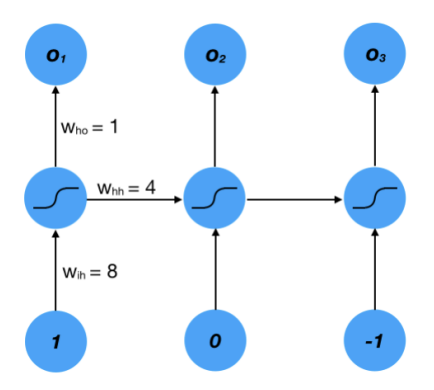


#### Q3.1
What is the value of O<sub>1</sub>? 

h<sub>1</sub> = sigmoid (W<sub>ih</sub> * i/p) = sigmoid (8) = 0.9996 </br>
O<sub>1</sub> = W<sub>ho</sub> * h<sub>1</sub> = 1 * 0.9996= 0.9996 (since o/p has linear activation function)


#### Q3.2
What is the value of O<sub>2</sub>?

h<sub>2</sub> = sigmoid(i/p * 8+4 * h<sub>1</sub>) = sigmoid (0 * 8 + 4 * 0.9996) = 0.9819 <br />
O<sub>2</sub> = 1 * h<sub>2</sub> = 1 * 0.9819 (since o/p has linear activation function)


### Q4.
You are training a recurrent neural network, and observe the following training loss. The plot is of loss vs iterations. Where X axis represents iterations and y-axis represents loss

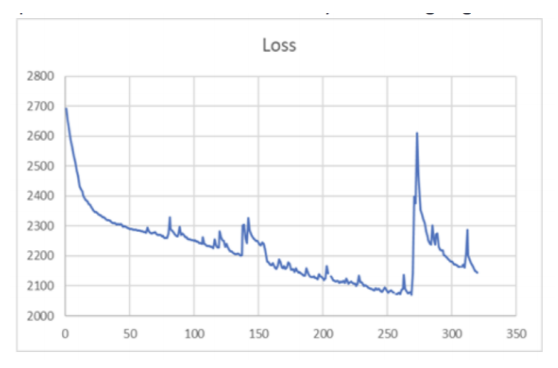

#### Q4.1
**What do you think is going on?** <br />
A. In some iterations, the examples are too tough. Hence error is high for those iterations. <br />
B. Some examples are causing exploding gradients. 


**Ans.** B. Some examples are causing exploding gradients.

#### Q4.2
What do you think is a good fix for this problem?

**Ans.** Since exploding gradient is causing the above training loss, gradient clipping can be used to fix the problem. i.e. clipping the gradient below a fixed maximum value.

## Q6.
(Bonus! (10%), coding assignment) Can you design your own RNN to predict values of Dow Jones Industrial Average for 5 business days after this HW submission date? Extra bonus will be given to the student who has results with the minimum MSE.  

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from math import ceil
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

from tensorflow.keras import backend as K

In [ ]:
df = pd.read_csv('DJI.csv')

In [ ]:
sequence_length = 60
num_training_samples = ceil(0.75*len(df))
training_set = df.iloc[:num_training_samples, 4:5].values
training_set_scaled = MinMaxScaler(feature_range = (0, 1)).fit_transform(training_set)
x_train = np.array([training_set_scaled[i - sequence_length:i, 0] for i in range(sequence_length, len(training_set_scaled))]) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
num_testing_samples: int = len(df) - x_train.shape[0]
testing_set_scaled = scaler.fit_transform(df.iloc[-num_testing_samples:, 4:5].values)
x_test = np.array([testing_set_scaled[i - sequence_length:i, 0] for i in range(sequence_length, len(testing_set_scaled))])
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.array([training_set_scaled[i, 0] for i in range(sequence_length, len(training_set_scaled))])
y_test = np.array([testing_set_scaled[i, 0] for i in range(sequence_length, len(testing_set_scaled))])

In [ ]:
model = Sequential()
model.add(layers.SimpleRNN(units=50,input_shape = (x_train.shape[1], 1), return_sequences = True))
model.add(layers.SimpleRNN(units=10))
model.add(layers.Dense(1))
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_train, y_train,epochs = 30, 
                    batch_size = 64, validation_data = (x_test, y_test),
                    callbacks = [early_stopping])

Epoch 1/30
15/15 [==============================] - 1s 40ms/step - loss: 0.1425 - val_loss: 0.0523
Epoch 2/30
15/15 [==============================] - 0s 22ms/step - loss: 0.0101 - val_loss: 0.0356
Epoch 3/30
15/15 [==============================] - 0s 25ms/step - loss: 0.0049 - val_loss: 0.0304
Epoch 4/30
15/15 [==============================] - 0s 23ms/step - loss: 0.0035 - val_loss: 0.0288
Epoch 5/30
15/15 [==============================] - 0s 24ms/step - loss: 0.0031 - val_loss: 0.0271
Epoch 6/30
15/15 [==============================] - 0s 24ms/step - loss: 0.0029 - val_loss: 0.0258
Epoch 7/30
15/15 [==============================] - 0s 23ms/step - loss: 0.0028 - val_loss: 0.0247
Epoch 8/30
15/15 [==============================] - 0s 24ms/step - loss: 0.0026 - val_loss: 0.0235
Epoch 9/30
15/15 [==============================] - 0s 23ms/step - loss: 0.0024 - val_loss: 0.0225
Epoch 10/30
15/15 [==============================] - 0s 23ms/step - loss: 0.0024 - val_loss: 0.0218
Epoch 11/

In [ ]:
time_horizon = 6
dates = df['Date']
adj_dates = mdates.datestr2num(dates)
future_lookback = adj_dates[-time_horizon:]
last_n = x_test[-time_horizon:,:,:]
future_prediction = model.predict(last_n)
future_prediction2 = np.reshape(future_prediction, (future_prediction.shape[0], 1))
future_prediction3 = scaler.inverse_transform(future_prediction2)
future_prediction3 = np.reshape(future_prediction3, (future_prediction3.shape[0]))
print(future_prediction3)

[28373.75  28409.951 28407.791 28234.732 28256.596 27818.898]
